#Assignment 2: Processing Datasets in Python


Authors: Axel Muñoz Baca 2132103
 Pablo Daniel Contreras Obregón 2055281
Class Schedule: N1

# **Part 1. Data Loading and Exploration**

Here we import Python libraries:

pandas → for handling tabular data (datasets).

numpy → for numerical operations.

matplotlib.pyplot → for plotting graphs.

google.colab.files → to upload the Excel file from the computer into Colab.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

fname = next(iter(uploaded))

df = pd.read_csv(fname)


df.head()

Saving diabetes.csv to diabetes (3).csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Counts how many missing values (NaN) each column has. Useful to detect incomplete data.**

In [46]:
# Revisar valores nulos
df.isna().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**In this dataset, some columns can have 0 values, which don’t make sense medically (e.g., blood pressure of 0).**

**This code checks how many zeros are in each of the specified columns.**

In [47]:
# Check zero values in medical columns
cols_ceros = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
{c: int((df[c] == 0).sum()) for c in cols_ceros}

{'Glucose': 5,
 'BloodPressure': 35,
 'SkinThickness': 227,
 'Insulin': 374,
 'BMI': 11}

**Generates summary statistics (count, mean, std, min, quartiles, max) for each column. Helps understand ranges and distributions.**

In [50]:
# Descriptive statistics
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Part 2.Data cleaning and normalization**

Here we clean the dataset:

For each column in cols_zeros, we calculate the median ignoring zeros.

We then replace the zero values with that median.



In [48]:
# Replace zeros with median of each column
for col in cols_with_zeros:
    median_val = df.loc[df[col] != 0, col].median()
    df.loc[df[col] == 0, col] = median_val

# Manual Min-Max Normalization
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness",
            "Insulin","BMI","DiabetesPedigreeFunction","Age"]

df_norm = df.copy()
df_norm[features] = (df_norm[features] - df_norm[features].min()) / (df_norm[features].max() - df_norm[features].min())

df_norm.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


# **3.Data visualization**

We plot two histograms:

One with original glucose values.

One with normalized glucose values.
The shape looks the same (distribution preserved), but the x-axis is scaled to 0–1 in the normalized version.

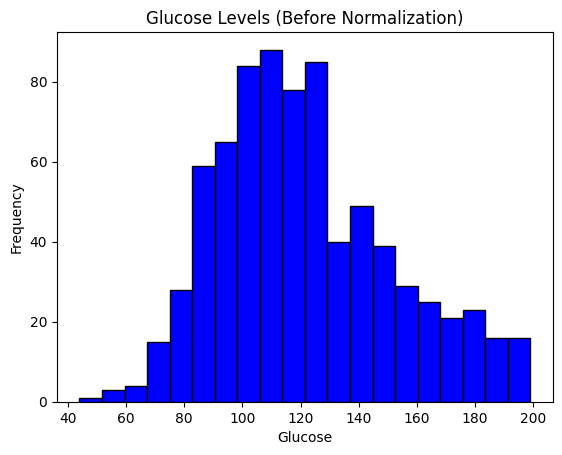

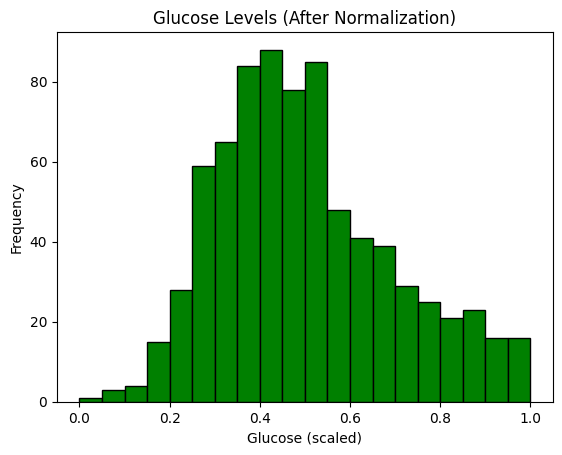

In [10]:
# Histograma de Glucose antes de normalización
plt.hist(df["Glucose"], bins=20, color="blue", edgecolor="black")
plt.title("Glucose Levels (Before Normalization)")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

# Histograma de Glucose después de normalización
plt.hist(df_norm["Glucose"], bins=20, color="green", edgecolor="black")
plt.title("Glucose Levels (After Normalization)")
plt.xlabel("Glucose (scaled)")
plt.ylabel("Frequency")
plt.show()


**A boxplot shows median, quartiles, and outliers in blood pressure values.**

**Outliers appear as dots beyond the whiskers.**

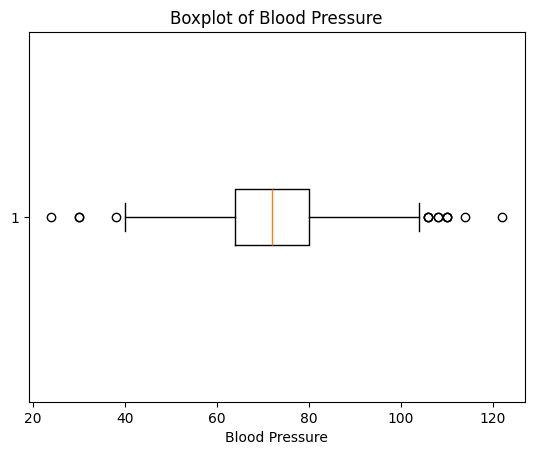

In [11]:
# Boxplot de BloodPressure
plt.boxplot(df["BloodPressure"], vert=False)
plt.title("Boxplot of Blood Pressure")
plt.xlabel("Blood Pressure")
plt.show()


**Creates a scatter plot comparing glucose vs BMI:**

Each dot is a patient.

It helps visualize correlation between the two variables.

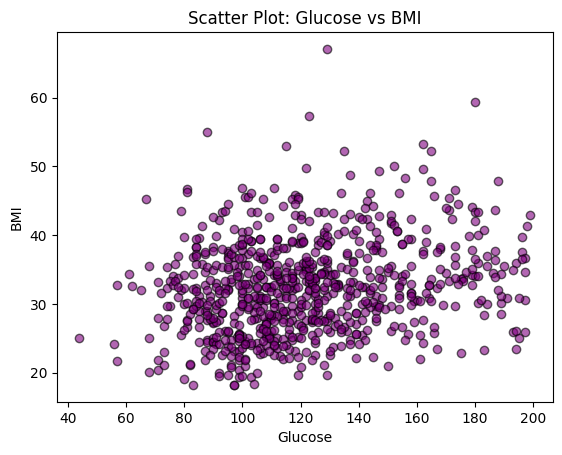

In [12]:
# Scatter plot entre Glucose y BMI
plt.scatter(df["Glucose"], df["BMI"], alpha=0.6, color="purple", edgecolor="black")
plt.title("Scatter Plot: Glucose vs BMI")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()


**Shows a bar chart of diabetes outcomes:**

0 = patients without diabetes.

1 = patients with diabetes.

Helps us see if the dataset is balanced or imbalanced.

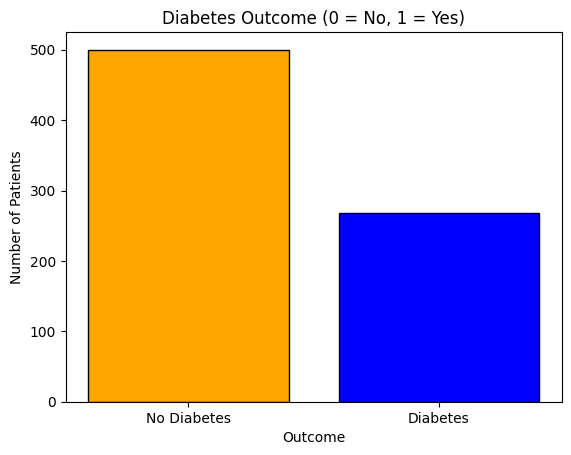

In [51]:
# Bar chart for Outcome
outcome_counts = df["Outcome"].value_counts().reindex([0,1], fill_value=0)
plt.bar(outcome_counts.index, outcome_counts.values, color=["orange","blue"], edgecolor="black")
plt.title("Diabetes Outcome (0 = No, 1 = Yes)")
plt.xlabel("Outcome")
plt.ylabel("Number of Patients")
plt.xticks([0,1], ["No Diabetes","Diabetes"])
plt.show()

# **Part 4: Questions and Answers**

**1. What impact do missing values have on data analysis?**

Missing values can reduce the accuracy and reliability of data analysis. They can distort statistical calculations, bias results, and limit the amount of usable data. If not handled properly, they may lead to misleading conclusions and poorly performing Machine Learning models.

**2. How can we detect and handle outliers in biomedical datasets?**

Outliers can be detected through visualization techniques (such as boxplots or scatter plots) and statistical methods (such as Z-scores or the interquartile range, IQR). Handling outliers depends on their origin: if they are errors, they can be corrected or removed; if they represent real but rare cases, they may be kept, but sometimes transformations (e.g., log-scaling) are applied to reduce their influence.

**3. What are some common causes of missing or incorrect data in biomedical studies?**

- Human error during data collection or entry

- Malfunctioning or poorly calibrated medical equipment

- Patients skipping or refusing certain tests

- Loss of data during storage or transmission

- Privacy restrictions that prevent sharing complete datasets

**4. How does normalizing data improve the performance of Machine Learning models?**

Normalization brings all features to the same numerical scale. This prevents features with large values (such as glucose levels) from dominating features with smaller values (such as the diabetes pedigree function). As a result, the learning algorithm converges faster and achieves better accuracy.

**5. Why is visualizing data an important step before applying Machine Learning models?**

Data visualization helps identify patterns, correlations, missing values, and outliers. By exploring the data visually, analysts can better decide on preprocessing techniques, avoid errors, and ensure that the dataset is suitable for model training.

**6. Why is preprocessing critical when working with medical datasets?**

Medical datasets often contain inconsistencies, missing data, or noise due to the complexity of healthcare environments. Preprocessing ensures that the dataset is clean, consistent, and properly structured, which is crucial when dealing with sensitive applications that affect patient health and medical decision-making.

**7. What ethical concerns should be considered when handling patient data?**

- Protecting patient privacy and confidentiality

- Obtaining informed consent for data usage

- Ensuring data is anonymized before analysis or sharing

- Securely storing and transmitting data to avoid leaks

- Avoiding misuse or discriminatory applications of health data